# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Read Dataset

In [2]:
df = pd.read_csv(r"C:\Users\user\Desktop\Study\3,1\big\project\Accepted_data\accepted_2007_to_2018Q42.csv")

C:\Users\user\AppData\Local\Temp\ipykernel_3004\4029922228.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\user\Desktop\Study\3,1\big\project\Accepted_data\accepted_2007_to_2018Q42.csv")


Dropping columns with too many unique values that are not necessary for the analysis.
 These columns may contain identifiers or irrelevant information that could introduce noise.

In [3]:
df = df.drop(columns=
[
 'id',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'issue_d',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'earliest_cr_line',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'sec_app_earliest_cr_line',
 'hardship_reason',
 'hardship_start_date',
 'hardship_end_date',
 'payment_plan_start_date',
 'hardship_loan_status',
 'debt_settlement_flag_date',
 'settlement_date',
], axis=1)


In [4]:
# manually defining the rows for each group
train_start, train_end = 0, int(0.7 * len(df))  # 70% for training
valid_start, valid_end = train_end, train_end + int(0.15 * len(df))  # 15% for validation
test_start, test_end = valid_end, len(df)  # 15% for testing

# splitting the data
train_data = df.iloc[train_start:train_end]
valid_data = df.iloc[valid_start:valid_end]
test_data = df.iloc[test_start:test_end]

# saving the files
train_data.to_csv('train.csv', index=False)
valid_data.to_csv('valid.csv', index=False)
test_data.to_csv('test.csv', index=False)

In [5]:
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,verification_status,loan_status,...,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,settlement_status,settlement_amount,settlement_percentage,settlement_term
0,NaN,22475.0,22475.0,22475.0,60 months,15.99,546.43,56319.0,Source Verified,Fully Paid,...,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN
1,NaN,3500.0,3500.0,3500.0,36 months,11.44,115.32,31500.0,Not Verified,Fully Paid,...,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN
2,NaN,10450.0,10450.0,10450.0,60 months,26.06,313.25,35000.0,Source Verified,Charged Off,...,NaN,NaN,NaN,NaN,Cash,Y,BROKEN,4476.0,40.0,0.0
3,NaN,6000.0,6000.0,6000.0,36 months,14.31,205.98,70000.0,Verified,Fully Paid,...,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN
4,NaN,35000.0,35000.0,35000.0,36 months,8.67,1107.63,175000.0,Verified,Fully Paid,...,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN


In [6]:
df.dtypes

member_id                float64
loan_amnt                float64
funded_amnt              float64
funded_amnt_inv          float64
term                      object
                          ...   
debt_settlement_flag      object
settlement_status         object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 126, dtype: object

In [7]:
x_train = train_data.drop(columns=['member_id', 'loan_status'], axis=1)
#y_train = train_data["loan_status"]
x_val = valid_data.drop(columns=['member_id', 'loan_status'], axis=1)
#y_val = valid_data["loan_status"]
x_test = test_data.drop(columns=['member_id', 'loan_status'], axis=1)
#y_test = test_data['loan_status']

loan_status = pd.get_dummies(df['loan_status'], drop_first=True)

y_train = loan_status.iloc[train_start:train_end]
y_val = loan_status.iloc[valid_start:valid_end]
y_test = loan_status.iloc[test_start:test_end]


In [8]:
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_val:", y_test.shape)


Shape of y_train: (791245, 8)
Shape of y_val: (169552, 8)
Shape of y_val: (169554, 8)


In [9]:
y_train

,Current,Default,Does not meet the credit policy. Status:Charged Off,Does not meet the credit policy. Status:Fully Paid,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
0,False,False,False,False,True,False,False,False
1,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False
4,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...
791240,False,False,False,False,True,False,False,False
791241,False,False,False,False,True,False,False,False
791242,False,False,False,False,True,False,False,False
791243,False,False,False,False,True,False,False,False


# Handle Missing Values

In [10]:
def missing_values(data):
    missing_values = data.isnull().sum()
    return missing_values

#### before handling

In [11]:
before_handle = missing_values(x_train)
print('missing values before handle', before_handle)

missing values before handle loan_amnt                    11
funded_amnt                  11
funded_amnt_inv              11
term                         11
int_rate                     11
                          ...  
debt_settlement_flag         11
settlement_status        783388
settlement_amount        783388
settlement_percentage    783388
settlement_term          783388
Length: 124, dtype: int64


Missing Value Percentage before_handle missing_values

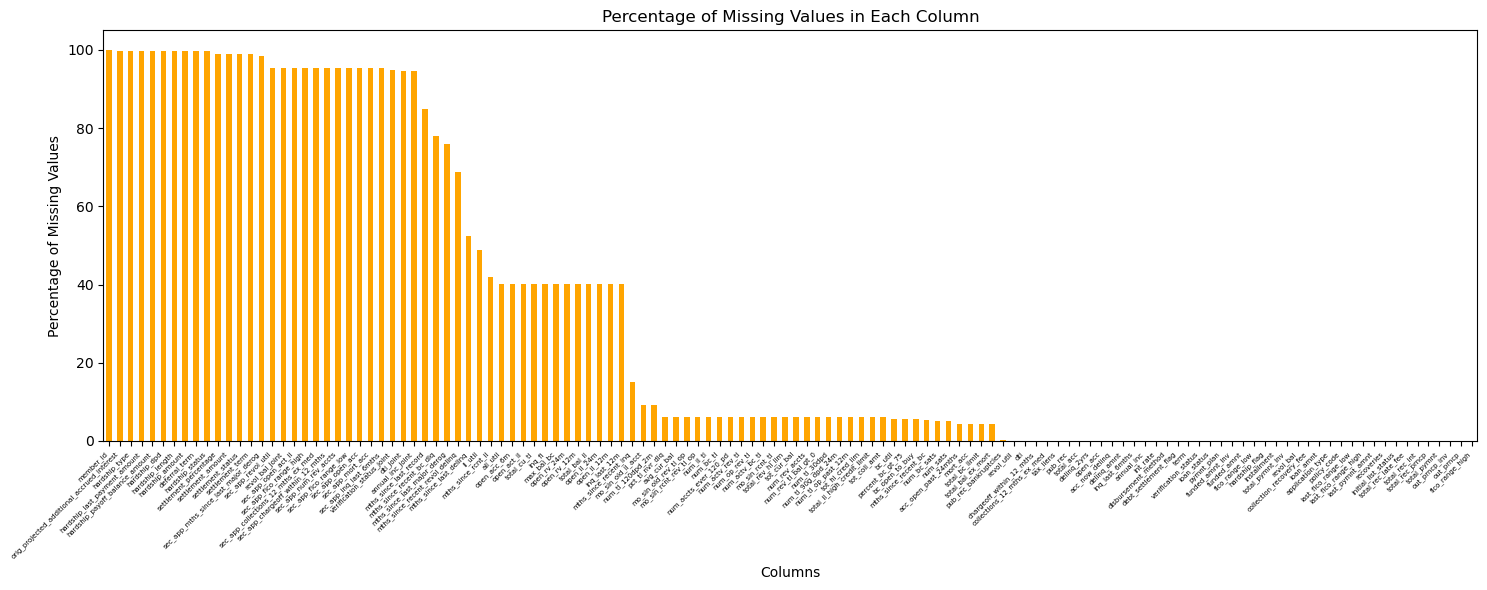

In [12]:
#percentage of missing values in each column
missing_values = df.isnull().mean() * 100

# sorting
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

plt.figure(figsize=(15, 6))
missing_values.plot(kind='bar', color='orange')

plt.title('Percentage of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=45, ha='right', fontsize=5)
plt.tight_layout()
plt.show()


In [13]:
threshold = 0.4

missing_train = x_train.isnull().mean() 
columns_to_drop = missing_train[missing_train > threshold].index

# dropping the columns from all three datasets
x_train = x_train.drop(columns=columns_to_drop, axis=1)
x_val = x_val.drop(columns=columns_to_drop, axis=1)
x_test = x_test.drop(columns=columns_to_drop, axis=1)


#### handling missing values

In [14]:
def handle_missing_values(data):
    #numerical and categorical columns based on data type
    numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
    categorical_columns = data.select_dtypes(include=['object', 'category']).columns

    # handling missing values in numerical columns
    for column in numerical_columns:
        if data[column].isnull().any():
            # filling missing values with the median of the column
            data[column] = data[column].fillna(data[column].median())

    # handling missing values in categorical columns
    for column in categorical_columns:
        if data[column].isnull().any():
            # filling missing values with the mode (most frequent value) of the column
            data[column] = data[column].fillna(data[column].mode()[0])

    return data

In [15]:
x_train = handle_missing_values(x_train)
x_val = handle_missing_values(x_val)
x_test = handle_missing_values(x_test)

In [16]:
after_handle = handle_missing_values(x_train)
print('missing values after handle', after_handle)

missing values after handle         loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
0         22475.0      22475.0          22475.0   60 months     15.99   
1          3500.0       3500.0           3500.0   36 months     11.44   
2         10450.0      10450.0          10450.0   60 months     26.06   
3          6000.0       6000.0           6000.0   36 months     14.31   
4         35000.0      35000.0          35000.0   36 months      8.67   
...           ...          ...              ...         ...       ...   
791240    10000.0      10000.0          10000.0   36 months      9.76   
791241    10000.0      10000.0          10000.0   36 months     13.67   
791242    10000.0      10000.0          10000.0   36 months     14.65   
791243    33000.0      33000.0          32975.0   36 months     17.27   
791244    12000.0      12000.0          11750.0   36 months     13.11   

        installment  annual_inc verification_status pymnt_plan    dti  ...  \
0            546.

Missing Value Percentage after handle missing values

# One-hot encoding

##### to convert categorical columns into binary columns

In [17]:
col_encoding =df.select_dtypes(include=['object', 'category']).columns

def One_Hot_encoding(df):
    return pd.get_dummies(df, drop_first=True).astype(int)

x_train = One_Hot_encoding(x_train)
x_val = One_Hot_encoding(x_val)
x_test = One_Hot_encoding(x_test)

y_train = One_Hot_encoding(y_train)
y_val = One_Hot_encoding(y_val)
y_test = One_Hot_encoding(y_test)


In [18]:
x_train

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,total_il_high_credit_limit,term_ 60 months,verification_status_Source Verified,verification_status_Verified,pymnt_plan_y,initial_list_status_w,application_type_Joint App,hardship_flag_Y,disbursement_method_DirectPay,debt_settlement_flag_Y
0,22475,22475,22475,15,546,56319,18,0,665,669,...,29274,1,1,0,0,1,0,0,0,0
1,3500,3500,3500,11,115,31500,28,0,680,684,...,19242,0,0,0,0,1,0,0,0,0
2,10450,10450,10450,26,313,35000,24,0,675,679,...,24293,1,1,0,0,1,0,0,0,1
3,6000,6000,6000,14,205,70000,22,0,665,669,...,50407,0,0,1,0,1,0,0,0,0
4,35000,35000,35000,8,1107,175000,16,0,670,674,...,112510,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791240,10000,10000,10000,9,321,43000,19,0,725,729,...,30721,0,0,0,0,0,0,0,0,0
791241,10000,10000,10000,13,340,54080,15,0,690,694,...,30721,0,0,0,0,0,0,0,0,0
791242,10000,10000,10000,14,344,80000,27,0,665,669,...,30721,0,0,1,0,0,0,0,0,0
791243,33000,33000,32975,17,1180,106000,21,0,710,714,...,30721,0,0,1,0,0,0,0,0,0


# Normlization

In [19]:
def normalization(df, min_vals=None, max_vals=None):
    #only numerical columns
    normalization_col = df.select_dtypes(include=['float64', 'int64']).columns

    if min_vals is None:
        min_vals = df[normalization_col].min()
    if max_vals is None:
        max_vals = df[normalization_col].max()

    # normalization
    df[normalization_col] = (df[normalization_col] - min_vals) / (max_vals - min_vals)

    return df, min_vals, max_vals

x_train, min_vals, max_vals = normalization(x_train)

# applying the same normalization on the test and validation sets 
x_test, _, _ = normalization(x_test, min_vals, max_vals)
x_val, _, _ = normalization(x_val, min_vals, max_vals)


In [20]:
x_train

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,...,total_il_high_credit_limit,term_ 60 months,verification_status_Source Verified,verification_status_Verified,pymnt_plan_y,initial_list_status_w,application_type_Joint App,hardship_flag_Y,disbursement_method_DirectPay,debt_settlement_flag_Y
0,22475,22475,22475,15,546,56319,18,0,665,669,...,29274,1,1,0,0,1,0,0,0,0
1,3500,3500,3500,11,115,31500,28,0,680,684,...,19242,0,0,0,0,1,0,0,0,0
2,10450,10450,10450,26,313,35000,24,0,675,679,...,24293,1,1,0,0,1,0,0,0,1
3,6000,6000,6000,14,205,70000,22,0,665,669,...,50407,0,0,1,0,1,0,0,0,0
4,35000,35000,35000,8,1107,175000,16,0,670,674,...,112510,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791240,10000,10000,10000,9,321,43000,19,0,725,729,...,30721,0,0,0,0,0,0,0,0,0
791241,10000,10000,10000,13,340,54080,15,0,690,694,...,30721,0,0,0,0,0,0,0,0,0
791242,10000,10000,10000,14,344,80000,27,0,665,669,...,30721,0,0,1,0,0,0,0,0,0
791243,33000,33000,32975,17,1180,106000,21,0,710,714,...,30721,0,0,1,0,0,0,0,0,0


In [21]:
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_val:", y_test.shape)    

Shape of y_train: (791245, 8)
Shape of y_val: (169552, 8)
Shape of y_val: (169554, 8)


# DecisionTree

In [22]:

# training the decision tree model
model = DecisionTreeClassifier(random_state=42, ccp_alpha=0.01)
model.fit(x_train, y_train)

# making predictions using the model
y_train_pred = model.predict(x_train)
y_val_pred = model.predict(x_val)
y_test_pred = model.predict(x_test)

# calculating the accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# printing the results
print(f"Accuracy on Training Data: {train_accuracy:.2f}")
print(f"Accuracy on Validation Data: {val_accuracy:.2f}")
print(f"Accuracy on Test Data: {test_accuracy:.2f}")

# classification report for the test dataset
print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred))


Accuracy on Training Data: 0.96
Accuracy on Validation Data: 0.94
Accuracy on Test Data: 0.93

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     87891
           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.88      1.00      0.94     59325
           5       0.00      0.00      0.00      1015
           6       0.00      0.00      0.00       576
           7       0.00      0.00      0.00      2712

   micro avg       0.92      0.97      0.95    151530
   macro avg       0.23      0.25      0.24    151530
weighted avg       0.90      0.97      0.93    151530
 samples avg       0.87      0.87      0.87    151530



c:\Users\user\anaco\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\anaco\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\anaco\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\anaco\Lib\site-packages\sklearn\metrics\_c

feature names and importance

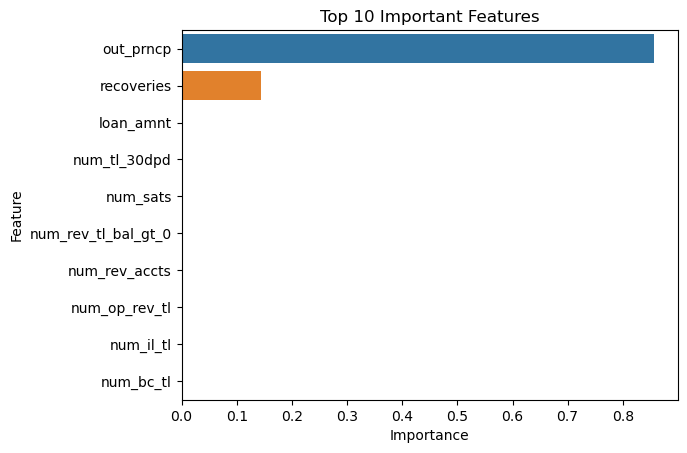

In [23]:
#feature names and their importance
feat = model.feature_names_in_  
imp = model.feature_importances_

# Creating a DataFrame containing features and their importance
df = pd.DataFrame({'Feature': feat, 'Importance': imp})

# Sorting the DataFrame by importance (from highest to lowest)
df = df.sort_values('Importance', ascending=False)[:10]

# Plotting the bar chart
sns.barplot(x='Importance', y='Feature', data=df)
plt.title('Top 10 Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


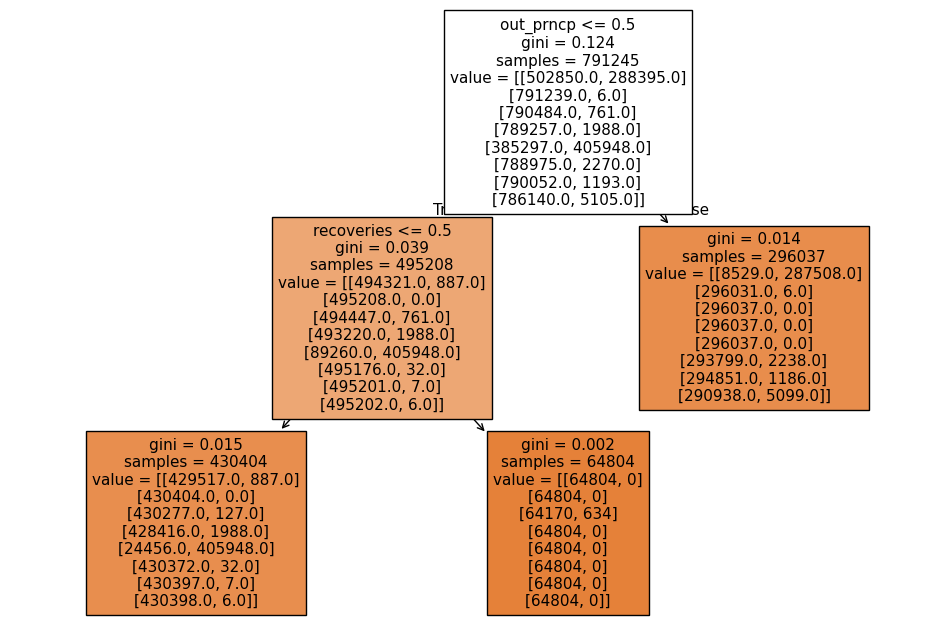

In [24]:
from sklearn.tree import plot_tree
#make sure to extract the correct column
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.iloc[:, 0]  # Assuming the first column is the target

class_names = y_train.unique()  # Get unique class names

plt.figure(figsize=(12,8))
plot_tree(model, filled=True, feature_names=x_train.columns, class_names=[str(i) for i in class_names])
plt.show()
